# Chapter 07 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from scipy import stats

# Sampling Distribution for a Proportion

 Implement resampling simulation and plot histogram

Minimum proportion: 25.00
Maximum proportion: 46.00
90%-confidence interval: [30.5 41.5]


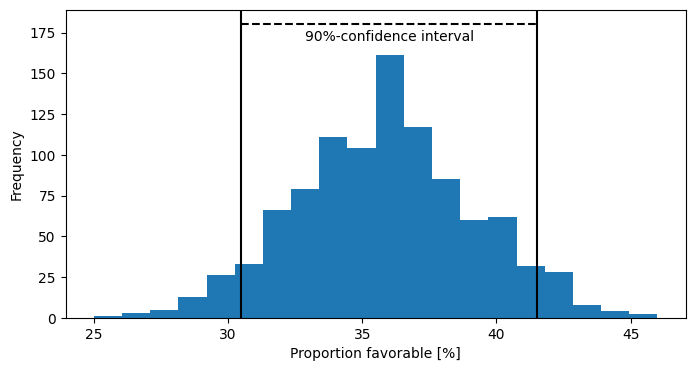

In [3]:
random.seed(1)
box = [1]*72 + [0]*128

proportion = []
for _ in range(1000):
    # sample with replacement
    sample = random.choices(box, k=200)
    proportion.append(100 * sum(sample) / len(sample))

ci_interval = np.percentile(proportion, [5, 95])
print(f"Minimum proportion: {min(proportion):.2f}")
print(f"Maximum proportion: {max(proportion):.2f}")
print(f"90%-confidence interval: {ci_interval}")

fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(proportion).plot.hist(bins=20, ax=ax)
ax.set_xlabel("Proportion favorable [%]")
ax.set_ylabel("Frequency")
for ci in ci_interval:
    ax.axvline(ci, color="black")
ax.plot(ci_interval, [180, 180], color="black", linestyle="--")
ax.text(ci_interval.mean(), 170, "90%-confidence interval", ha="center")
plt.show()

# Sampling distribution for a mean

 Load toyota.csv dataset and create a histogram

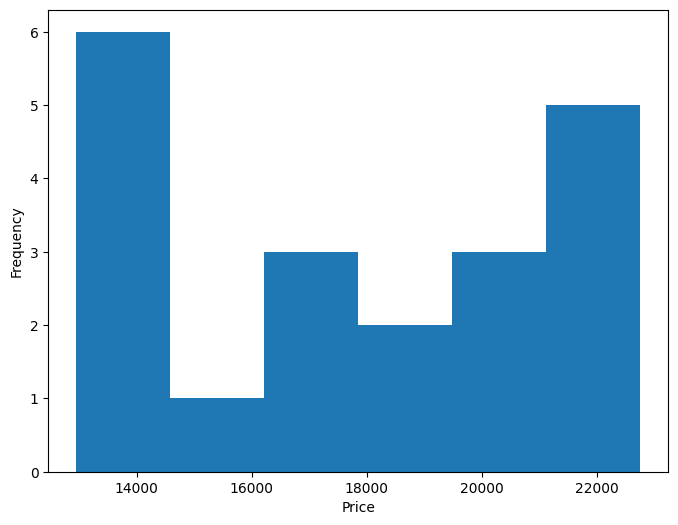

In [4]:
toyota = pd.read_csv("toyota.txt", header=None)
toyota.columns = ["price"]

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(toyota["price"], bins=6)
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")
plt.show()

# Example: Toyota Corolla prices

 Load toyota.csv dataset and create a histogram

In [5]:
toyota = pd.read_csv("toyota.txt", header=None)
toyota.columns = ["price"]

 Single resample with replacement

In [6]:
random.seed(123)
sample = random.choices(toyota["price"], k=20)
print(pd.DataFrame({
    "original data": toyota["price"],
    "resample": sample,
}))
print(np.mean(sample))

    original data  resample
0           13500     13750
1           13750     13750
2           13950     21500
3           14950     13950
4           13750     16750
5           12950     13500
6           16900     20950
7           18600     16900
8           21500     17950
9           12950     14950
10          20950     16900
11          19950     16900
12          19600     13750
13          21500     13500
14          22500     21500
15          22000     13750
16          22750     19950
17          17950     13750
18          16750     16900
19          16950     21500
16617.5


 Resampling procedure

In [7]:
random.seed(123)

def resampleMeans(data, nResamples=1000, nSamples=20):
    means = []
    for _ in range(nResamples):
        sample = random.choices(data, k=nSamples)
        means.append(np.mean(sample))
    return means
means = resampleMeans(toyota["price"])
ci_interval = np.percentile(means, [5, 95])
print(ci_interval)

[16356.625 18950.125]


 Histogram of resampled means

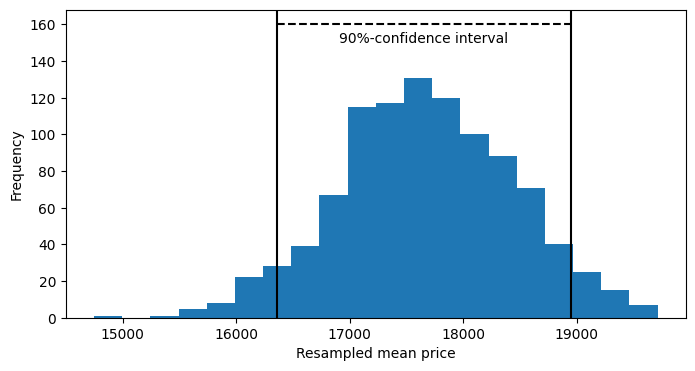

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(means).plot.hist(bins=20, ax=ax)
ax.set_xlabel("Resampled mean price")
ax.set_ylabel("Frequency")
for ci in ci_interval:
    ax.axvline(ci, color="black")
ax.plot(ci_interval, [160, 160], color="black", linestyle="--")
ax.text(ci_interval.mean(), 150, "90%-confidence interval", ha="center")
plt.show()

# Normal Distribution

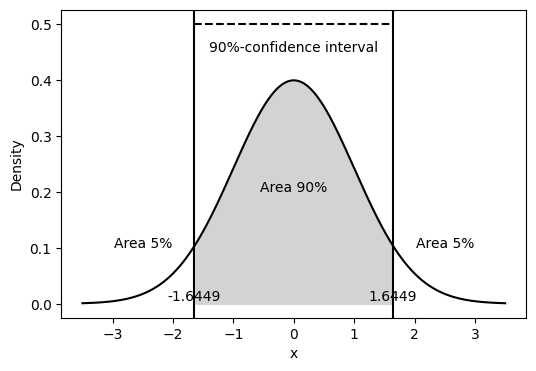

In [9]:
x = np.linspace(-3.5, 3.5, 401)
y = stats.norm.pdf(x)

fig, ax = plt.subplots(figsize=[6, 4])
ax.plot(x, y, c="black")

ci_interval = [-1.6449, 1.6449]

mask = (ci_interval[0] < x) & (x < ci_interval[1])
ax.fill_between(x[mask], y[mask], color="lightgrey")

for ci in ci_interval:
    ax.axvline(ci, color="black")
    ax.text(ci, 0.0, f"{ci:.4f}",
            verticalalignment="bottom", horizontalalignment="center")
ax.plot(ci_interval, [0.5, 0.5], color="black", linestyle="--")
ax.text(0, 0.45, "90%-confidence interval", ha="center")


ax.text(-2.5, 0.1, "Area 5%", horizontalalignment="center")
ax.text(2.5, 0.1, "Area 5%", horizontalalignment="center")
ax.text(0, 0.2, "Area 90%", horizontalalignment="center")

ax.set_xlabel("x")
ax.set_ylabel("Density")
plt.show()

 Calculate the standard deviation of the resampled means:

In [10]:
# estimate the standard error from resample means
print(f"standard error of mean (resample): {np.std(means):.1f}")

# estimate the standard error from the data
print(f"standard error of mean (data): {np.std(toyota['price'])/np.sqrt(20):.1f}")

standard error of mean (resample): 772.4
standard error of mean (data): 764.4
